In [33]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sklearn.metrics import mean_squared_error
np.set_printoptions(suppress=True)

In [34]:
data = pd.read_csv('./data/district_covariates/all_covariates_clustered.csv')
data.head()

,district,reg_year,reg_month,count_lag_month,count_lag_year,count,male_15_24yr_2011,total_population_2011,sex_ratio_2011,total_non_worker,gdp_2011_12,class
0,Agra,2016,1,1235,1235,1235,588704.0,4558268.0,844.0,3028953.0,13058.94,2
1,Agra,2016,2,1235,1192,1192,588704.0,4558268.0,844.0,3028953.0,13058.94,2
2,Agra,2016,3,1192,1160,1160,588704.0,4558268.0,844.0,3028953.0,13058.94,2
3,Agra,2016,4,1160,1160,1160,588704.0,4558268.0,844.0,3028953.0,13058.94,2
4,Agra,2016,5,1160,1409,1409,588704.0,4558268.0,844.0,3028953.0,13058.94,2


#### Normalizing or  Quantization

In [35]:
norm = True
#norm = False

In [36]:
df = data.copy()
if norm:
    # removing columns that dont need normalisation
    cols = data.columns
    normalise_cols = list(set(cols)-set(['count', 'district', 'class', 'count_lag_year'
                                         , 'count_lag_month', 'reg_month', 'reg_year', 'sex_ratio_2011']))
    # normalising columns
    for colname in normalise_cols:
        df[colname] = (data[colname] - data[colname].min())/(data[colname].max() - data[colname].min())
else:
    df['male_15_24yr_2011'] = df['male_15_24yr_2011'] / df['total_population_2011']
    df['total_non_worker'] = df['total_non_worker'] / df['total_population_2011']
    #df['gdp_2011_12'] = df['gdp_2011_12'] / df['total_population_2011']

df.head()

,district,reg_year,reg_month,count_lag_month,count_lag_year,count,male_15_24yr_2011,total_population_2011,sex_ratio_2011,total_non_worker,gdp_2011_12,class
0,Agra,2016,1,1235,1235,1235,0.790661,0.734132,844.0,0.75468,0.707565,2
1,Agra,2016,2,1235,1192,1192,0.790661,0.734132,844.0,0.75468,0.707565,2
2,Agra,2016,3,1192,1160,1160,0.790661,0.734132,844.0,0.75468,0.707565,2
3,Agra,2016,4,1160,1160,1160,0.790661,0.734132,844.0,0.75468,0.707565,2
4,Agra,2016,5,1160,1409,1409,0.790661,0.734132,844.0,0.75468,0.707565,2


In [37]:
data = df.copy()

In [38]:
districts = data['district'].unique()                      # 'districts' contains list of unique districts names
num_districts = len(districts)                             # 'num_districts' contains no. of unique districts
dist_lookup = dict(zip(districts, range(num_districts)))   # 'dist_lookup' is a dict, ex. ['agra':0, ... ]
districts_code_all = data['district_code'] = data.district.replace(dist_lookup).values
print('#of districts: ', num_districts)

#of districts:  75


In [39]:
cluster_0 = data[data['class']==0]
cluster_1 = data[data['class']==1]
cluster_2 = data[data['class']==2]
cluster_3 = data[data['class']==3]
cluster_4 = data[data['class']==4]
cluster_5 = data[data['class']==5]
cluster_6 = data[data['class']==6]
cluster_7 = data[data['class']==7]
cluster_8 = data[data['class']==8]
cluster_9 = data[data['class']==9]
cluster_10 = data[data['class']==10]

print('\nClass 0: # of districts:', cluster_0['district'].unique().size, '\n', cluster_0['district'].unique())
print('\nClass 1: # of districts:', cluster_1['district'].unique().size, '\n', cluster_1['district'].unique())
print('\nClass 2: # of districts:', cluster_2['district'].unique().size, '\n', cluster_2['district'].unique())
print('\nClass 3: # of districts:', cluster_3['district'].unique().size, '\n', cluster_3['district'].unique())
print('\nClass 4: # of districts:', cluster_4['district'].unique().size, '\n', cluster_4['district'].unique())
print('\nClass 5: # of districts:', cluster_5['district'].unique().size, '\n', cluster_5['district'].unique())
print('\nClass 6: # of districts:', cluster_6['district'].unique().size, '\n', cluster_6['district'].unique())
print('\nClass 7: # of districts:', cluster_7['district'].unique().size, '\n', cluster_7['district'].unique())
print('\nClass 8: # of districts:', cluster_8['district'].unique().size, '\n', cluster_8['district'].unique())
print('\nClass 9: # of districts:', cluster_9['district'].unique().size, '\n', cluster_9['district'].unique())
print('\nClass 10: # of districts:', cluster_10['district'].unique().size, '\n', cluster_10['district'].unique())


Class 0: # of districts: 9 
 ['Bahraich' 'Ballia' 'Barabanki' 'Deoria' 'Gonda' 'Pratapgarh'
 'Rae Bareli' 'Shahjahanpur' 'Unnao']

Class 1: # of districts: 9 
 ['Banda' 'Bhadohi' 'Etawah' 'Gautam Budh Nagar' 'Hathras' 'Jalaun'
 'Kannauj' 'Kaushambi' 'Sant Kabeer Nagar']

Class 2: # of districts: 10 
 ['Agra' 'Azamgarh' 'Bareilly' 'Ghaziabad' 'Gorakhpur' 'Jaunpur'
 'Kanpur City' 'Lucknow' 'Moradabad' 'Sitapur']

Class 3: # of districts: 9 
 ['Ambedkar Nagar' 'Ayodhya' 'Basti' 'Fatehpur' 'Mathura' 'Mau' 'Mirzapur'
 'Rampur' 'Siddharth Nagar']

Class 4: # of districts: 7 
 ['Auraiya' 'Baghpat' 'Chitrakoot' 'Hamirpur' 'Lalitpur' 'Mahoba'
 'Shravasti']

Class 5: # of districts: 3 
 ['Hardoi' 'Kheri' 'Muzaffar Nagar']

Class 6: # of districts: 2 
 ['Etah' 'Kasganj']

Class 7: # of districts: 1 
 ['Prayagraj']

Class 8: # of districts: 10 
 ['Aligarh' 'Badaun' 'Bijnor' 'Bulandshahar' 'Ghazipur' 'Kushi Nagar'
 'Meerut' 'Saharanpur' 'Sultanpur' 'Varanasi']

Class 9: # of districts: 6 
 ['Ameth

##### if need be, divide cluster into 2 smailler clusters

In [40]:
# half_col = np.random.choice(cluster_0['district'].unique(), 7, replace=False).tolist()
# half_col1 = list(set(cluster_0['district'].unique()) - set(half_col))

# cluster_half1 = data[data['district'].isin(half_col)]
# cluster_half2 = data[data['district'].isin(half_col1)]
# cluster_half2['district'].unique().size

# StanModel

In [41]:
import pystan

In [213]:
try:
    model = pickle.load(open('./model/partial_pooling.pkl', 'rb'))
except:
    model_code = """
    data {
        int<lower=1>         N;                      // number of districts
        int<lower=1>         M;                      // number of months
        int<lower=1>         num_attr;               // number of attributes
        int<lower=num_attr>  sigma_beta_dof;         // (degree_of_freedom)parameter for inv_wishart prior on sigma_beta
        int<lower=N>         sigma_error_dof;        // (degree_of_freedom)parameter for inv_wishart prior on sigma_error
        real<lower=0.0>      alpha_mean;                         
        real<lower=0.0>      alpha_variance;
        real<lower=0.0>      mu_beta_mean;
        real<lower=0.0>      mu_beta_variance;
        real<lower=0.0>      sigma_beta_variance;    // diagonal value for matrix, parameter for inv_wishart
        real<lower=0.0>      sigma_error_variance;   // diagonal value for matrix, parameter for inv_wishart
        
        matrix[M, num_attr]  X[N];
        vector[N]            crime_count[M];
    }

    parameters {
        vector<lower=0.0>[N]               alpha;
        vector[num_attr]        beta[N];
        vector[num_attr]        mu_beta;
        cov_matrix[num_attr]    sigma_beta;
        cov_matrix[N]           sigma_err;
    }

    transformed parameters {
        vector[N]    crime_count_hat[M];
        for(j in 1:N) {
            for(t in 1:M) {
                crime_count_hat[t, j] = alpha[j] + dot_product(X[j, t], beta[j]);
            }
        }
    }
    
    model {
        mu_beta     ~    multi_normal(rep_vector(mu_beta_mean, num_attr), diag_matrix(rep_vector(mu_beta_variance,num_attr)));
        sigma_beta  ~    inv_wishart(sigma_beta_dof, diag_matrix(rep_vector(sigma_beta_variance,num_attr)));
        for(j in 1:N){
            alpha[j]       ~    normal(alpha_mean, alpha_variance);
            beta[j]        ~    multi_normal(mu_beta, sigma_beta);
        }
        sigma_err   ~    inv_wishart(sigma_error_dof, diag_matrix(rep_vector(sigma_error_variance,N)));
        for(t in 1:M){
            crime_count[t] ~  multi_normal(crime_count_hat[t], sigma_err);
        }
    }
    """
    model = pystan.model.StanModel(model_code=model_code, model_name='partial_pooling')
    with open('./model/partial_pooling.pkl', 'wb') as f:
        pickle.dump(model, f)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL partial_pooling_5229cd73cebb2eee105cd9160817f74f NOW.


In [214]:
# try:
#     model = pickle.load(open('./model/partial_pooling_no_inverse_wishartt.pkl', 'rb'))
# except:
#     model_code = """
#     data {
#         int<lower=1>         N;                      // number of districts
#         int<lower=1>         M;                      // number of months
#         int<lower=1>         num_attr;               // number of attributes
#         int<lower=num_attr>  sigma_beta_dof;         // (degree_of_freedom)parameter for inv_wishart prior on sigma_beta
#         int<lower=N>         sigma_error_dof;        // (degree_of_freedom)parameter for inv_wishart prior on sigma_error
#         real<lower=0.0>      alpha_mean;                         
#         real<lower=0.0>      alpha_variance;
#         real<lower=0.0>      mu_beta_mean;
#         real<lower=0.0>      mu_beta_variance;
#         real<lower=0.0>      sigma_beta_variance;    // diagonal value for matrix, parameter for inv_wishart
#         real<lower=0.0>      sigma_error_variance;   // diagonal value for matrix, parameter for inv_wishart
        
#         matrix[M, num_attr]  X[N];
#         vector[N]            crime_count[M];
#     }

#     parameters {
#         vector<lower=0.0>[N]               alpha;
#         vector<lower=0.0>[num_attr]        beta[N];
#         vector<lower=0.0>[num_attr]        mu_beta;
#         cov_matrix[num_attr]    sigma_beta;
#     }

#     transformed parameters {
#         vector[N]    crime_count_hat[M];
#         for(j in 1:N) {
#             for(t in 1:M) {
#                 crime_count_hat[t, j] = alpha[j] + dot_product(X[j, t], beta[j]);
#             }
#         }
#     }
    
#     model {
#         mu_beta     ~    multi_normal(rep_vector(mu_beta_mean, num_attr), diag_matrix(rep_vector(mu_beta_variance,num_attr)));
#         sigma_beta  ~    inv_wishart(sigma_beta_dof, diag_matrix(rep_vector(sigma_beta_variance,num_attr)));
#         for(j in 1:N){
#             alpha[j]       ~    normal(alpha_mean, alpha_variance);
#             beta[j]        ~    multi_normal(mu_beta, sigma_beta);
#         }
#         for(j in 1:N) {
#             for(t in 1:M) {
#                  crime_count[t, j] ~  normal(crime_count_hat[t, j], sigma_error_variance);
#             }
#         }
#     }
#     """
#     model = pystan.model.StanModel(model_code=model_code, model_name='partial_pooling_no_inv_wishart')
#     with open('./model/partial_pooling_no_inverse_wishart.pkl', 'wb') as f:
#         pickle.dump(model, f)

In [215]:
def getCluster(num):
    return  data[data['class']==num]

def getTrainTestDataFor(cluster, train_month, test_month):
    dist_nms = cluster['district'].unique()
    if norm:
        cols = ['male_15_24yr_2011', 'total_population_2011', 'total_non_worker', 'gdp_2011_12', 'count_lag_month', 'count_lag_year']
    else:
        cols = ['sex_ratio_2011', 'male_15_24yr_2011', 'total_non_worker', 'gdp_2011_12', 'count_lag_month', 'count_lag_year']
    x_data = []
    y_data = []
    for dn in dist_nms:
        x_data.append(data[data['district'] == dn][cols].values)
        y_data.append(data[data['district'] == dn]['count'].values)
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    return x_data[::,:train_month,::], y_data[:,:train_month], x_data[::,-test_month:,::], y_data[:,-test_month:]

def plotgraph(actual, predicted, months, years, clust_num, title, save, df):
    numPlots = predicted.size/12
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    for i in range(int(numPlots)):
        index = i*12
        plt.subplot(130+i+1)
        plt.plot(months[index:index+12], actual[index:index+12], label='Actual')
        plt.plot(months[index:index+12], predicted[index:index+12], label='Predicted')
        mse = mean_squared_error(actual[index:index+12], predicted[index:index+12])
        df.loc[df['district'] == title, [str(np.unique(years[index:index+12])[0])]] = int(mse)
        plt.legend()
        plt.title(str(np.unique(years[index:index+12])) + ' mse: ' + str(int(mse)))
    plt.subplots_adjust(top=0.80)
    if save:
        plt.savefig('./images/pp/cluster_{}/{}.png'.format(clust_num, title), bbox_inches='tight')

In [245]:
cluster_num = 9
training_months = 24
testing_months = 36

clust    = getCluster(cluster_num)
dist_nms = clust['district'].unique()
X_train, Y_train, X_test, Y_test = getTrainTestDataFor(clust, training_months, testing_months)
print('Shape of X_train, Y_train, X_test, Y_test')
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print('Number of districts: ', dist_nms.size)

Shape of X_train, Y_train, X_test, Y_test
(6, 24, 6) (6, 24) (6, 36, 6) (6, 36)
Number of districts:  6


In [246]:
pert = np.random.permutation(X_train.shape[1])
print(pert)
X_train_copy = X_train.copy()
Y_train_copy = Y_train.copy()
np.take(X_train_copy,pert,axis=1,out=X_train_copy)
np.take(Y_train_copy,pert,axis=1,out=Y_train_copy)
print('Shape of X_train, Y_train, X_test, Y_test')
print(X_train_copy.shape, Y_train_copy.shape, X_test.shape, Y_test.shape)

[12  9 23  6 16 17  3 11 13 18  0 20  5  8 19 21 10 14  2 22  7  1  4 15]
Shape of X_train, Y_train, X_test, Y_test
(6, 24, 6) (6, 24) (6, 36, 6) (6, 36)


In [287]:
num_attr              = X_train.shape[2]
sigma_beta_dof        = X_train.shape[2]    # should be >= 0
sigma_error_dof       = dist_nms.size       # should be >= 0
alpha_mean            = 0.0                   # should be >= 0
alpha_variance        = 100.0                   # should be >= 0
mu_beta_mean          = 0.0                   # should be >= 0
mu_beta_variance      = 50                  # should be >= 0
sigma_beta_variance   = 0.01                    # should be >= 0
sigma_error_variance  = 0.01                    # should be >= 0

In [288]:
# num_attr              = X_train.shape[2]
# sigma_beta_dof        = X_train.shape[2]+2        # should be >= 0
# sigma_error_dof       = dist_nms.size+2           # should be >= 0
# alpha_mean            = 0.0                     # should be >= 0
# alpha_variance        = 2.0                   # should be >= 0
# mu_beta_mean          = 0.0                     # should be >= 0
# mu_beta_variance      = 10.0                    # should be >= 0
# sigma_beta_variance   = 5               # should be >= 0
# sigma_error_variance  = 40                    # should be >= 0

In [289]:
data_dict = {
    'N'                    : dist_nms.size,                  #Number of districts
    'M'                    : training_months,                #Number of training months
    'num_attr'             : num_attr,
    'sigma_beta_dof'       : sigma_beta_dof,
    'sigma_error_dof'      : sigma_error_dof,
    'alpha_mean'           : alpha_mean,
    'alpha_variance'       : alpha_variance,
    'mu_beta_mean'         : mu_beta_mean,
    'mu_beta_variance'     : mu_beta_variance,
    'sigma_beta_variance'  : sigma_beta_variance,
    'sigma_error_variance' : sigma_error_variance,
    'X'                    : X_train_copy,
    'crime_count'          : Y_train_copy.T
}

In [290]:
model_fit = model.sampling(data=data_dict, iter=1000, chains=6, warmup=400, n_jobs=-1,
                           seed=np.random.randint(100), control=dict(max_treedepth=12, adapt_delta=0.81))

In [291]:
beta = np.mean(model_fit.extract()['beta'], axis = 0)
alpha = np.mean(model_fit.extract()['alpha'], axis = 0)
print(alpha, '\n', beta)
temp_dict = {
    'alpha':model_fit.extract()['alpha'],
    'beta' :model_fit.extract()['beta']
}

[38.02656857 60.78414701 53.7591243  54.3510671  92.97976762 55.13902279] 
 [[ 0.0862242   0.32948264  0.33802402 -0.2072345   0.20381179  0.70619909]
 [ 0.08455469  0.33747128  0.33768528 -0.19735358  0.34614849  0.59218426]
 [ 0.08387487  0.3302969   0.33651812 -0.20322874  0.22869022  0.70329671]
 [ 0.08495596  0.33275533  0.33620627 -0.20320936  0.2523451   0.67895276]
 [ 0.08489891  0.32514524  0.34428482 -0.20142082  0.09189721  0.76915357]
 [ 0.08238438  0.33081709  0.33656775 -0.20090797  0.21641603  0.68649453]]


In [292]:
cols = np.array(['district'])
cols = np.append(cols, clust['reg_year'].unique())
msedf = pd.DataFrame(columns=cols)
msedf['district'] = dist_nms

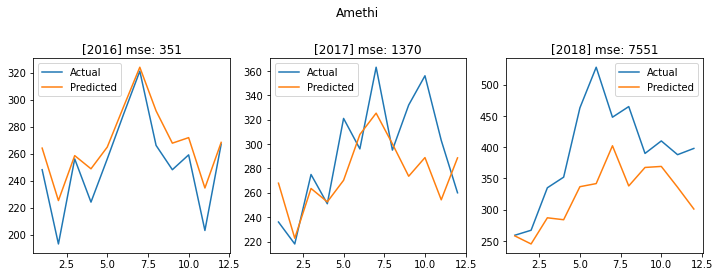

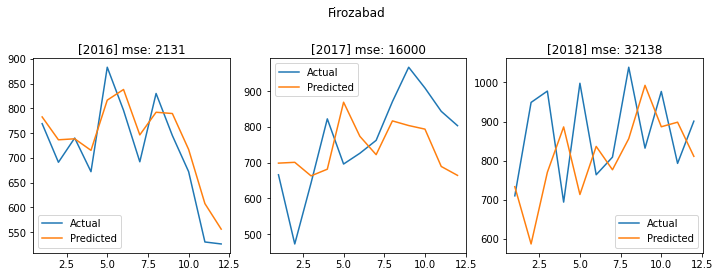

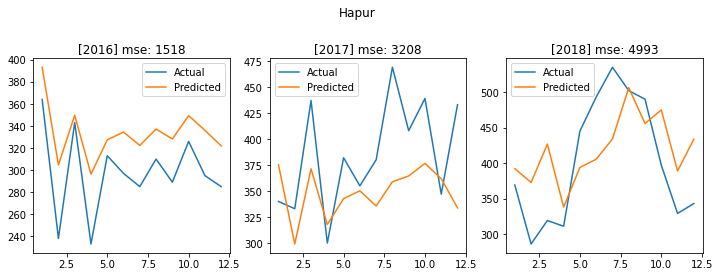

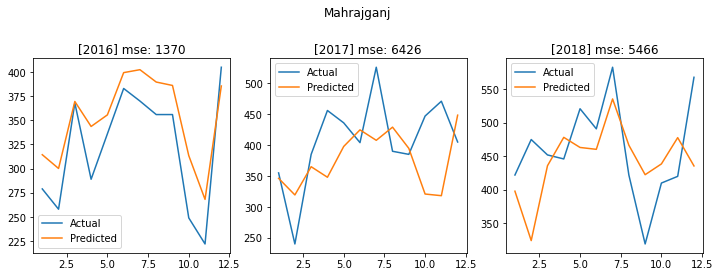

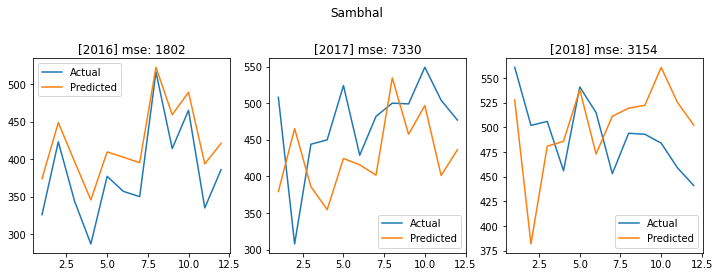

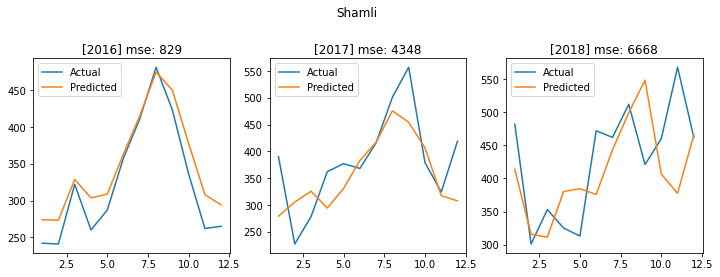

In [293]:
for i in range(dist_nms.size):
    predictions = alpha[i] + X_test[i].dot(beta[i])
    months = clust[clust['district'] == dist_nms[i]]['reg_month'].values
    years = clust[clust['district'] == dist_nms[i]]['reg_year'].values
    plotgraph(Y_test[i], predictions, months, years, cluster_num, dist_nms[i], True, msedf)

(6, 6)


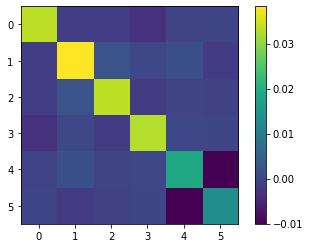

In [294]:
print(model_fit.extract()['sigma_beta'].mean(0).shape)
plt.imshow(model_fit.extract()['sigma_beta'].mean(0))
plt.colorbar()
plt.savefig('./images/pp/cluster_{}/sigma_beta.png'.format(cluster_num), bbox_inches='tight')
plt.show()

(6, 6)


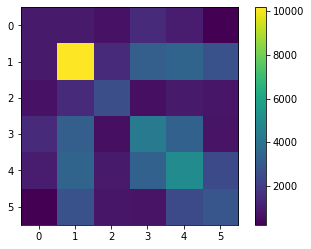

In [295]:
print(model_fit.extract()['sigma_err'].mean(0).shape)
plt.imshow(model_fit.extract()['sigma_err'].mean(0))
plt.colorbar()
plt.savefig('./images/pp/cluster_{}/sigma_err.png'.format(cluster_num), bbox_inches='tight')
plt.show()

In [274]:
msedf.to_csv('./csvs/pp/cluster_{}.csv'.format(cluster_num), index=False)

In [275]:
#clusdict = {}

In [276]:
print('c'+str(cluster_num))

c9


In [277]:
clusdict['c'+str(cluster_num)] = temp_dict

In [ ]:
color = {
    'c0':'b',
    'c1':'g',
    'c2':'r',
    'c3':'c',
    'c4':'m',
    'c5':'y',
    'c6':'k',
    'c7':'b',
    'c8':'g',
    'c9':'r',
    'c10':'c'
}

In [ ]:
def plotbox(data, labels, title, marker):
    fig, ax1 = plt.subplots(figsize=(16, 8))
    fig.canvas.set_window_title('A Boxplot Example')
    plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.25)
    
    bp = plt.boxplot(data, notch=0, sym=marker, vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker=marker)
    
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax1.set_axisbelow(True)
    ax1.set_title('Posterior distribution of '+title)
    for i in range(len(label)):
        box = bp['boxes'][i]
        boxX = []
        boxY = []
        for j in range(5):
            boxX.append(box.get_xdata()[j])
            boxY.append(box.get_ydata()[j])
        boxCoords = list(zip(boxX, boxY))

        boxPolygon = Polygon(boxCoords, facecolor=color[label[i]])
        ax1.add_patch(boxPolygon)
        
    ax1.set_xlim(0, len(label) + 1)
    xtickNames = plt.setp(ax1, xticklabels=label)
    #ax1.set_ylim(0, 1.3)
    plt.setp(xtickNames, rotation=90, fontsize=9)
    plt.savefig('./images/pp/{}.png'.format(title))
    plt.show()

In [ ]:
alp = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['alpha'].shape[1]):
        alp.append(clusdict[key]['alpha'][:, each:each+1].reshape(-1))
        label.append(key)
plotbox(alp, label, 'alpha', '+')

In [ ]:
bet0 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet0.append(clusdict[key]['beta'][:, each:each+1, 0:1].reshape(-1))
        label.append(key)
plotbox(bet0, label, 'Beta(Count lagged Month)', '+')

In [ ]:
bet1 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet1.append(clusdict[key]['beta'][:, each:each+1, 1:2].reshape(-1))
        label.append(key)
plotbox(bet1, label, 'Beta(Count lagged Year)', '+')

In [ ]:
bet2 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet2.append(clusdict[key]['beta'][:, each:each+1, 2:3].reshape(-1))
        label.append(key)
plotbox(bet2, label, 'Beta(Population)', '+')

In [ ]:
bet3 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet3.append(clusdict[key]['beta'][:, each:each+1, 3:4].reshape(-1))
        label.append(key)
plotbox(bet3, label, 'Beta(Male Population)', '+')

In [ ]:
bet4 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet4.append(clusdict[key]['beta'][:, each:each+1, 4:5].reshape(-1))
        label.append(key)
plotbox(bet4, label, 'Beta(Unemployment)', '+')